In [1]:
import os
import numpy as np
import pandas as pd
import cv2 as cv2
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from tensorflow.keras.models import Model, load_model
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
pd.set_option('display.max_columns', 80)

In [2]:
def classify(sdir, csv_path,  model_path, name):
    class_df=pd.read_csv(csv_path)    
    img_height=int(class_df['height'].iloc[0])
    img_width =int(class_df['width'].iloc[0])
    img_size=(img_height, img_width)
    scale=float(class_df['scale by'].iloc[0])
    path_list=[]
    paths=os.listdir(sdir)
    for f in paths:
        path_list.append(os.path.join(sdir,f))
    model=load_model(model_path)
    image_count=len(path_list)    
    index_list=[] 
    prob_list=[]
    for i in range (image_count):       
        img=plt.imread(path_list[i]) 
        img=cv2.resize(img, img_size) 
        img=img * scale
        img=np.expand_dims(img, axis=0)
        p= np.squeeze (model.predict(img))           
        index=np.argmax(p)         
        prob=p[index]
        index_list.append(index)
        prob_list.append(prob)
    if image_count==1:
        class_name= class_df['class'].iloc[index_list[0]]
        probability= prob_list[0]
        imgpath=path_list[0]        
        img=plt.imread(imgpath)/255
        plt.title(class_name, color='blue', fontsize=16)
        plt.imshow(img)
        return class_name, probability
    most=0
    for i in range (len(index_list)-1):
        key= index_list[i]
        keycount=0
        for j in range (i+1, len(index_list)):
            nkey= index_list[j]            
            if nkey == key:
                keycount +=1                
        if keycount> most:
            most=keycount
            isave=i             
    best_index=index_list[isave]    
    psum=0
    bestsum=0
    for i in range (len(index_list)):
        psum += prob_list[i]
        if index_list[i]==best_index:
            bestsum += prob_list[i]  
    imgpath=path_list[isave]
    img=plt.imread(imgpath)/255
    class_name=class_df['class'].iloc[best_index]
    plt.title(class_name, color='blue', fontsize=16)
    plt.imshow(img)
    return class_name, bestsum/image_count

 unknown bird is predicted as being AFRICAN CROWNED CRANE with a probability of 97.72 %


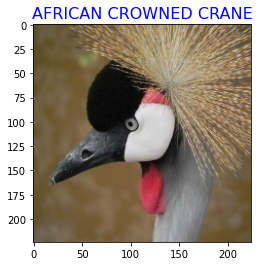

In [4]:
predict_dir=r'D:\CODING\Projects\birds\_rev2\images to test'  
name='unknown bird'
mloc=r'D:\CODING\Projects\birds\_rev2\EfficientNetB1-sports-98.98.h5'
csvloc=r'D:\CODING\Projects\birds\_rev2\class_dict.csv'
result, probability=classify(predict_dir, csvloc,mloc, name)
print (f' {name} is predicted as being {result} with a probability of {probability * 100:5.2f} %')

In [ ]:
predict_dir=r'D:\CODING\Projects\birds\_rev2\images to test'
result, probability=classify(predict_dir, csvloc,mloc, name)
print (f' {name} is predicted as being {result} with a probability of {probability * 100:5.2f} %')